## 6. Exploring the embedding & grouping in MEGMA

For the **Embedding**, we can use various manifold learning algorithms or random method to embed microbes in 2D; For the **Grouping**, we can use various clustering methods to group microbes or use the pre-defined group information to group the microbes. Now, let's try different methods to perform the embedding and grouping operations in `MEGMA`.


[6.1 Microbial embedding](#6.1-Microbial-embedding)
* [6.1.1 Manifold embedding](#6.1.1-Manifold-embedding)
* [6.1.2 Ramdom embedding](#6.1.2-Ramdom-embedding)

[6.2 Microbial grouping](#6.2-Microbial-grouping)
* [6.2.1 Hierarchical clustering tree based grouping](#6.2.1-Hierarchical-clustering-tree-based-grouping)
* [6.2.2 Taxonomic tree based grouping](#6.2.2-Taxonomic-tree-based-grouping)

### 6.1 Microbial embedding

In this section, we can change the embedding method on the loaded `megma` object. The `megma` object supports a refit operation to update itself, so you don't need to reinitialize a new `megma`.

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd
import numpy as np
import aggmap
from aggmap import loadmap, AggMap

megma = loadmap('./megma/megma.all')

#### 6.1.1 Manifold embedding

Let's try several manifold methods to embed the microbes in megma.

In [24]:
manifold_methods = ['mds', 'isomap', 'umap', 'tsne', 'lle', 'se']

In [25]:
# using mds
megma_new = megma.copy()
megma_new.fit(emb_method = 'mds',  verbose=0)
megma_new.plot_scatter(htmlpath='./images', radius = 5)

2022-08-24 15:36:23,232 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2022-08-24 15:36:28,732 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-24 15:36:29,802 - INFO - [bidd-aggmap] - Finished
2022-08-24 15:36:29,808 - INFO - [bidd-aggmap] - generate file: ./images/feature points_849_correlation_mds_scatter
2022-08-24 15:36:29,814 - INFO - [bidd-aggmap] - save html file to ./images/feature points_849_correlation_mds_scatter


In [26]:
# using isomap
megma_new = megma.copy()
megma_new.fit(emb_method = 'isomap',  verbose=0)
megma_new.plot_scatter(htmlpath='./images', radius = 5)

2022-08-24 15:36:29,828 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2022-08-24 15:36:30,074 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-24 15:36:30,980 - INFO - [bidd-aggmap] - Finished
2022-08-24 15:36:30,986 - INFO - [bidd-aggmap] - generate file: ./images/feature points_849_correlation_isomap_scatter
2022-08-24 15:36:30,992 - INFO - [bidd-aggmap] - save html file to ./images/feature points_849_correlation_isomap_scatter


In [27]:
# using tsne
megma_new = megma.copy()
megma_new.fit(emb_method = 'tsne',  verbose=0)
megma_new.plot_scatter(htmlpath='./images', radius = 5)

2022-08-24 15:36:31,006 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2022-08-24 15:36:31,665 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-24 15:36:32,025 - INFO - [bidd-aggmap] - Finished
2022-08-24 15:36:32,033 - INFO - [bidd-aggmap] - generate file: ./images/feature points_849_correlation_tsne_scatter
2022-08-24 15:36:32,041 - INFO - [bidd-aggmap] - save html file to ./images/feature points_849_correlation_tsne_scatter


#### 6.1.2 Ramdom embedding

Random embedding method just randomly assigns the 2D-coordinates to the microbes:

In [29]:
# using tsne
megma_new = megma.copy()
megma_new.fit(emb_method = 'random', random_state=123, verbose=0)
megma_new.plot_scatter(htmlpath='./images', radius = 5)

2022-08-24 15:38:42,385 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2022-08-24 15:38:42,406 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-24 15:38:43,505 - INFO - [bidd-aggmap] - Finished
2022-08-24 15:38:43,511 - INFO - [bidd-aggmap] - generate file: ./images/feature points_849_correlation_random_scatter
2022-08-24 15:38:43,518 - INFO - [bidd-aggmap] - save html file to ./images/feature points_849_correlation_random_scatter


### 6.2 Microbial grouping

The microbes can be grouped into several groups based on their **phenotype** or **genotype** distances. 

* For the phenotype-based grouping (or metagenomic grouping), we can calculate the microbial metagenomic abundance correlation distances and then use the agglomerative hierarchical clustering to group the microbes. The default MEGMA uses this method to group the microbes (The cluster number c = 5)，the number of clusters can be specified by users. 

* For the genotype-based grouping, we can build a phylogenetic tree and then we can group the microbes by truncating taxonomic levels in the phylogenetic tree, such as by truncating the Kingdom or Phylum level we can generate the different cluster numbers.

The cluster number c is the number of the channels in the feature map, e. g., c=10 means that the number of channels of the 2D-microbiomeprint is 10. 


#### 6.2.1 Hierarchical clustering tree based grouping


2022-08-24 16:07:38,374 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2022-08-24 16:07:38,997 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-24 16:07:40,003 - INFO - [bidd-aggmap] - Finished


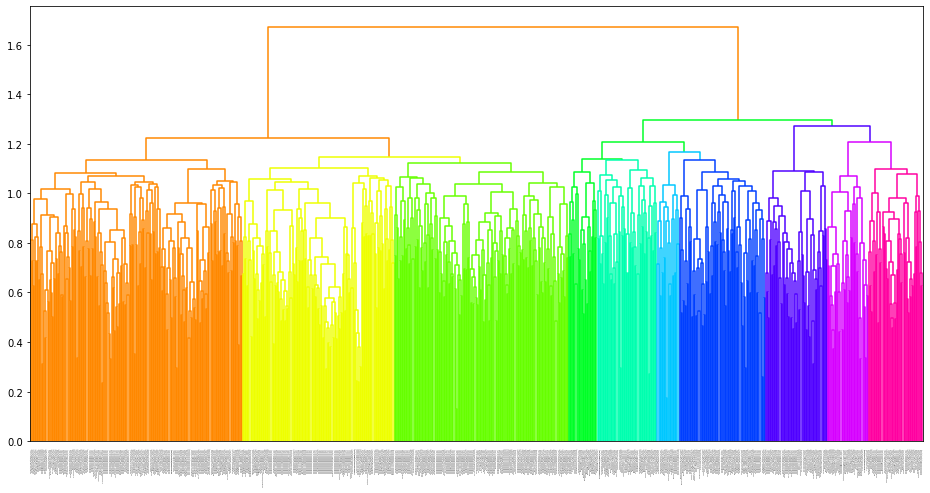

In [41]:
# c = 10
megma_new = megma.copy()
megma_new.fit(cluster_channels = 10, verbose = 0)
fig = megma_new.plot_tree(leaf_font_size=0)

In [42]:
megma_new.plot_scatter(htmlpath='./images', radius = 5)

2022-08-24 16:07:50,211 - INFO - [bidd-aggmap] - generate file: ./images/feature points_849_correlation_umap_scatter
2022-08-24 16:07:50,220 - INFO - [bidd-aggmap] - save html file to ./images/feature points_849_correlation_umap_scatter


2022-08-24 16:07:50,239 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2022-08-24 16:07:50,862 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-24 16:07:51,868 - INFO - [bidd-aggmap] - Finished


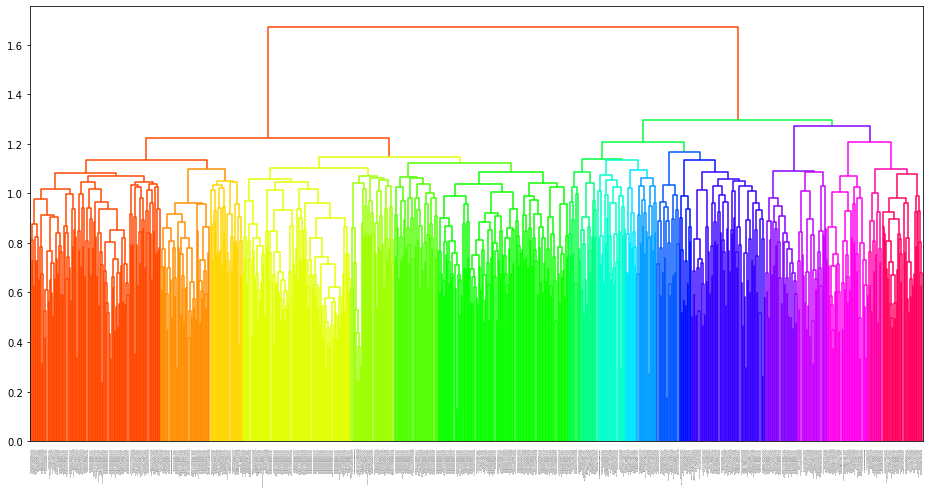

In [43]:
# c = 20
megma_new = megma.copy()
megma_new.fit(cluster_channels = 20, verbose = 0)
fig = megma_new.plot_tree(leaf_font_size=0)

In [44]:
megma_new.plot_scatter(htmlpath='./images', radius = 5)

2022-08-24 16:08:01,983 - INFO - [bidd-aggmap] - generate file: ./images/feature points_849_correlation_umap_scatter
2022-08-24 16:08:01,994 - INFO - [bidd-aggmap] - save html file to ./images/feature points_849_correlation_umap_scatter


#### 6.2.2 Taxonomic tree based grouping

Now, let's try to group the microbes by taxonomic level. The microbes we used has no taxonomic profiles, therefore, we first need to map the taxonomic profile to each microbes based on the mOTU ID.

The parameter `feature_group_list` supports a customized grouping information to group the microbes, we can generate the feature group list based on the taxonomic level of kingdom, phylum, class, order, and so on.

In [78]:
## get the taxonomic profiles of all mOTUs 
url = 'https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/dataset/'
dfm = pd.read_csv(url + 'mOTUs_new_taxonomic_profile.txt',sep='\t')
dfm = dfm.set_index('#mOTU')[['consensus_taxonomy']]
dfm.head(5)

,consensus_taxonomy
#mOTU,
ref_mOTU_v2_0001,k__Bacteria|p__Firmicutes|c__Erysipelotrichia|...
ref_mOTU_v2_0002,k__Bacteria|p__Proteobacteria|c__Betaproteobac...
ref_mOTU_v2_0003,k__Bacteria|p__Firmicutes|c__Negativicutes|o__...
ref_mOTU_v2_0004,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactob...
ref_mOTU_v2_0005,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactob...


In [101]:
## get the mOTU id for our microbes in megma
dfs = pd.DataFrame(megma.alist, columns = ['IDs'])
dfs['mOTU'] = dfs.IDs.apply(lambda x:x.split('[')[1]).apply(lambda x:x.split(']')[0])
dfs = dfs.set_index('mOTU')
dfs.head(5)

,IDs
mOTU,
ref_mOTU_v2_0473,Clostridium saccharogumia [ref_mOTU_v2_0473]
ref_mOTU_v2_0643,Clostridium innocuum [ref_mOTU_v2_0643]
ref_mOTU_v2_0860,Clostridium sp. KLE 1755 [ref_mOTU_v2_0860]
ref_mOTU_v2_0883,Clostridium scindens [ref_mOTU_v2_0883]
ref_mOTU_v2_0886,Clostridium boltae/clostridioforme [ref_mOTU_v...


In [102]:
#join the taxonomic profile
dfs = dfs.join(dfm)
dfs.head(5)

,IDs,consensus_taxonomy
mOTU,,
ref_mOTU_v2_0473,Clostridium saccharogumia [ref_mOTU_v2_0473],k__Bacteria|p__Firmicutes|c__Erysipelotrichia|...
ref_mOTU_v2_0643,Clostridium innocuum [ref_mOTU_v2_0643],k__Bacteria|p__Firmicutes|c__Erysipelotrichia|...
ref_mOTU_v2_0860,Clostridium sp. KLE 1755 [ref_mOTU_v2_0860],k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
ref_mOTU_v2_0883,Clostridium scindens [ref_mOTU_v2_0883],k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
ref_mOTU_v2_0886,Clostridium boltae/clostridioforme [ref_mOTU_v...,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...


In [103]:
#the taxonomic level for each microbe
dft = dfs['consensus_taxonomy'].apply(lambda x: dict([i.split('__') for i in x.split('|')])).apply(pd.Series)
level_dict = {'k':'kingdom', 'p':'phylum', 'c':'class' ,'o':'order' ,'f':'family' ,'g': 'genus','s': 'species'}
dft = dft.rename(columns=level_dict)
dft.head(5)

,kingdom,phylum,class,order,family,genus,species
mOTU,,,,,,,
ref_mOTU_v2_0473,Bacteria,Firmicutes,Erysipelotrichia,Erysipelotrichales,Erysipelotrichaceae,Erysipelatoclostridium,[Clostridium] saccharogumia
ref_mOTU_v2_0643,Bacteria,Firmicutes,Erysipelotrichia,Erysipelotrichales,Erysipelotrichaceae,Erysipelatoclostridium,[Clostridium] innocuum [C Clostridioides diffi...
ref_mOTU_v2_0860,Bacteria,Firmicutes,Clostridia,Clostridiales,Clostridiaceae,Clostridium,Clostridium sp. KLE 1755
ref_mOTU_v2_0883,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Lachnoclostridium,[Clostridium] scindens
ref_mOTU_v2_0886,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Lachnoclostridium,[Clostridium] sp. [C boltae/clostridioforme]


In [120]:
# grouping by kingdom level
feature_group_list = dft['kingdom'].tolist()
megma_new = megma.copy()
megma_new.fit(feature_group_list = feature_group_list, verbose = 0)
megma_new.plot_scatter(htmlpath='./images', radius = 5)

2022-08-24 18:11:18,456 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-24 18:11:19,461 - INFO - [bidd-aggmap] - Finished
2022-08-24 18:11:19,467 - INFO - [bidd-aggmap] - generate file: ./images/feature points_849_correlation_umap_scatter
2022-08-24 18:11:19,472 - INFO - [bidd-aggmap] - save html file to ./images/feature points_849_correlation_umap_scatter


In [107]:
# grouping by phylum level
feature_group_list = dft['phylum'].tolist()
megma_new = megma.copy()
megma_new.fit(feature_group_list = feature_group_list, verbose = 0)
megma_new.plot_scatter(htmlpath='./images', radius = 5)

2022-08-24 17:39:35,833 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-24 17:39:36,838 - INFO - [bidd-aggmap] - Finished
2022-08-24 17:39:36,844 - INFO - [bidd-aggmap] - generate file: ./images/feature points_849_correlation_umap_scatter
2022-08-24 17:39:36,853 - INFO - [bidd-aggmap] - save html file to ./images/feature points_849_correlation_umap_scatter


In [106]:
# grouping by class level
feature_group_list = dft['class'].tolist()
megma_new = megma.copy()
megma_new.fit(feature_group_list = feature_group_list, verbose = 0)
megma_new.plot_scatter(htmlpath='./images', radius = 5)

2022-08-24 17:39:05,503 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-24 17:39:06,512 - INFO - [bidd-aggmap] - Finished
2022-08-24 17:39:06,518 - INFO - [bidd-aggmap] - generate file: ./images/feature points_849_correlation_umap_scatter
2022-08-24 17:39:06,530 - INFO - [bidd-aggmap] - save html file to ./images/feature points_849_correlation_umap_scatter
